In [36]:
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Data Acquisition and Cleaning
 - 1a. Download the Yellow Taxi trip data for January 2022
The data has already been provided as a .parquet file, so we can skip this step.

 - 1b. Clean the data by handling missing values, correcting anomalies, and filtering records based on plausible trip distances and fare amounts

In [86]:
import pandas as pd

# Loading parquet file
file_path = './yellow_tripdata_2022-01.parquet'
df = pd.read_parquet(file_path)

# Displaying basic information and initial rows
df.info()
df.head()

# Handle missing values
df_cleaned = df.dropna()
print(df_cleaned.isna().sum())
print(df_cleaned.shape)

# Display dataset information
df.info()
df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


### Correct anomalies and filter records
 - First, visualize data distribution for 'trip_distance' & 'fare_amount'

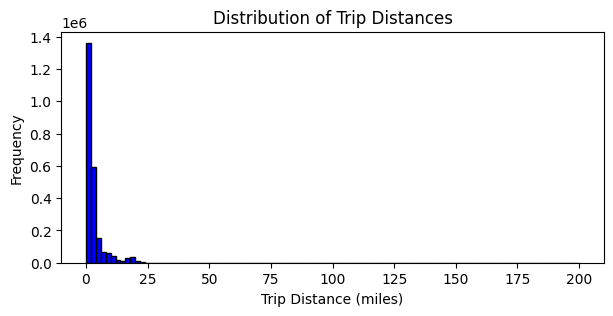

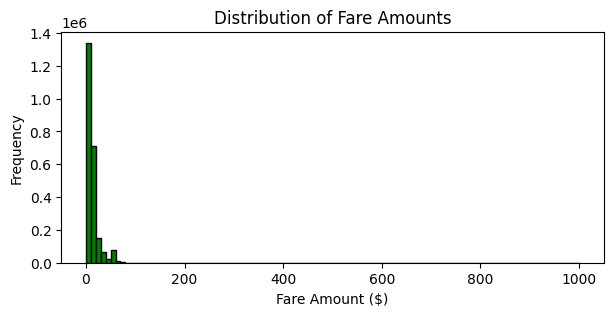

In [87]:
# Visualize the distribution of trip distances
plt.figure(figsize=(7, 3))
plt.hist(df_cleaned['trip_distance'], bins=100, range=(0, 200), color='blue', edgecolor='black')
plt.title('Distribution of Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of fare amounts
plt.figure(figsize=(7, 3))
plt.hist(df_cleaned['fare_amount'], bins=100, range=(0, 1000), color='green', edgecolor='black')
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

Applying thresholds and reasonings:
For "Trip Distance":
 - Remove trips with trip_distance <= 0.
 - Remove trips with trip_distance > 100 miles (threshold based on typical city ride expectations).

For "Fare Amount":
 - Remove trips with fare_amount <= 0.
 - Remove trips with fare_amount > 500 dollars (threshold based on typical fare expectations).

In [88]:
# Correct anomalies and filter records
df_cleaned = df_cleaned[(df_cleaned['trip_distance'] > 0) & (df_cleaned['fare_amount'] > 0)]
df_cleaned = df_cleaned[(df_cleaned['trip_distance'] <= 100) & (df_cleaned['fare_amount'] <= 500)]
df_cleaned.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [90]:
# Metrics to be added to check for other anomolies

# 1. Calculate trip_duration
df_cleaned['trip_duration'] = (df_cleaned['tpep_dropoff_datetime'] - df_cleaned['tpep_pickup_datetime']).dt.total_seconds() / 60

# 2. Calculate the total_fare
df_cleaned['total_fare'] = df_cleaned['fare_amount'] + df_cleaned['extra'] + df_cleaned['mta_tax'] + df_cleaned['tip_amount'] + df_cleaned['tolls_amount']+ df_cleaned['improvement_surcharge'] + df_cleaned['congestion_surcharge'] + df_cleaned['airport_fee']

# Cleaned data information and initial rows
print("Cleaned Data Information:")
print(df_cleaned.info())
df_cleaned.head(25)

Cleaned Data Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352805 entries, 0 to 2392427
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,total_fare
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667,24.45
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000,13.30
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667,10.56
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333,11.80
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333,30.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,1,2022-01-01 00:49:14,2022-01-01 00:58:29,2.0,3.20,1.0,N,263,107,1,...,3.0,0.5,2.95,0.0,0.3,17.75,2.5,0.0,9.250000,20.25
22,1,2022-01-01 00:09:01,2022-01-01 00:17:15,1.0,1.20,1.0,N,161,43,1,...,3.0,0.5,2.15,0.0,0.3,12.95,2.5,0.0,8.233333,15.45
23,1,2022-01-01 00:30:06,2022-01-01 00:38:11,1.0,1.70,1.0,N,239,24,1,...,3.0,0.5,3.25,0.0,0.3,14.05,2.5,0.0,8.083333,16.55
24,1,2022-01-01 00:46:41,2022-01-01 00:57:53,1.0,1.60,1.0,N,239,263,1,...,3.0,0.5,2.35,0.0,0.3,14.15,2.5,0.0,11.200000,16.65


### Correct other anomalies and filter records
 - visualize data distribution for 'passenger_count'

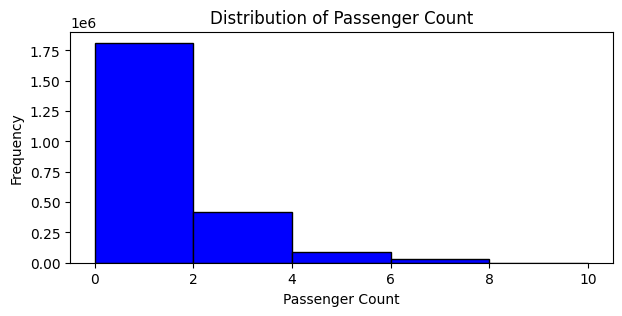

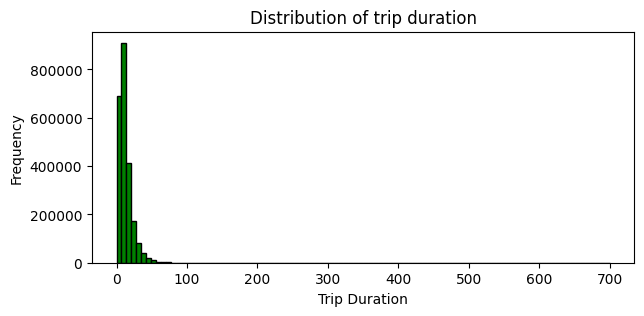

In [94]:
# Visualize the distribution of passenger count
plt.figure(figsize=(7, 3))
plt.hist(df_cleaned['passenger_count'], bins=5, range=(0, 10), color='blue', edgecolor='black')
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(7, 3))
plt.hist(df_cleaned['trip_duration'], bins=100, range=(0, 700), color='green', edgecolor='black')
plt.title('Distribution of trip duration')
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.show()

#### Applying thresholds and reasonings:

For "Passenger Count":
 - Remove trips with passenger count <= 0.
 - Remove trips with passenger count >= 6 (threshold based on typical city ride capacity).

For "Trip Duration":
 - Remove trips with trip duration <= 0.
 - Remove trips with trip duration > 1440 (Filtering trips longer than 24 hours).

For "tpep_dropoff_datetime" and "tpep_pickup_datetime"
 - Remove trips with drop-off time before the pickup time

For "total_fare":
 - Remove trips with total_amount > total_fare

In [95]:
# Trip Duration Anomalies
df_cleaned = df_cleaned[df_cleaned['trip_duration'] > 0]
df_cleaned = df_cleaned[df_cleaned['trip_duration'] <= 1440]  #filtering for longer than 24 hours

# Passenger Count Anomalies
df_cleaned = df_cleaned[(df_cleaned['passenger_count'] > 0) & (df_cleaned['passenger_count'] <= 6)]

# Fare Amount Components Anomalies
df_cleaned = df_cleaned[df_cleaned['total_fare'] >= df_cleaned['total_amount']]

# Time-Based Anomalies
df_cleaned = df_cleaned[df_cleaned['tpep_dropoff_datetime'] > df_cleaned['tpep_pickup_datetime']]

In [99]:
df_cleaned.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,total_fare
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667,24.45
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000,13.30
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667,10.56
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333,11.80
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333,30.30


In [100]:
# Export to CSV
csv_file_path = './cleaned_yellowcab_trip_data.csv'
df_cleaned.to_csv(csv_file_path, index=False)
print("Data exported to CSV successfully.")

Data exported to CSV successfully.
